In [1]:
# import library
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
from collections import Counter
from sklearn import model_selection, svm
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.layers import Input,Dense,concatenate,Dropout
from tensorflow.keras.models import Model,load_model
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.utils import plot_model
from scipy.sparse import csr_matrix, lil_matrix
from tensorflow.keras.metrics import MeanAbsoluteError,MeanSquaredError,Accuracy,Precision,Recall
from sklearn.model_selection import GridSearchCV
%load_ext autotime

time: 0 ns (started: 2022-09-17 00:22:09 +07:00)


In [2]:
# Multi label module
from skmultilearn.problem_transform import BinaryRelevance, ClassifierChain, LabelPowerset
from skmultilearn.adapt import MLkNN,MLTSVM

time: 15 ms (started: 2022-09-17 00:22:09 +07:00)


In [3]:
# Path File
path="C:\\Users\\Hasan Zein\\BDC Unsyiah\\data_preprocessed.csv"

time: 0 ns (started: 2022-09-17 00:22:10 +07:00)


In [4]:
# Open file
data = pd.read_csv(path)

time: 93 ms (started: 2022-09-17 00:22:10 +07:00)


In [5]:
# Check file
data

,Unnamed: 0,bully,tweet,individual,group,gender,physical,race,religion,tweet_preprocessed,tweet_preprocessed_tokenized,tweet_preprocessed_complete
0,0,no,USER terimakasih Ustadz sudah bersuara tentang...,0,0,0,0,0,0,terimakasih ustadz suara radikal radikal entah...,"['terimakasih', 'ustadz', 'suara', 'radikal', ...",terimakasih ustadz suara radikal radikal entah...
1,1,no,USER USER Maaf sebenarnya twiter pertama kali ...,0,0,0,0,0,0,user maaf benar twiter pertama kali dbuat buka...,"['user', 'maaf', 'benar', 'twiter', 'pertama',...",maaf benar twiter pertama kali dbuat bukan bua...
2,2,yes,USER Anjing tai goblok idiot bangsat monyet ba...,1,0,1,1,0,0,anjing tai goblok idiot bangsat monyet babi fu...,"['anjing', 'tai', 'goblok', 'idiot', 'bangsat'...",anjing tai goblok idiot bangsat monyet babi fu...
3,3,no,"Hadiri Lokakarya Kebudayaan Daerah, Bupati Rup...",0,0,0,0,0,0,hadir lokakarya budaya daerah bupati rupinus a...,"['hadir', 'lokakarya', 'budaya', 'daerah', 'bu...",hadir lokakarya budaya daerah bupati rupinus a...
4,4,yes,USER USER USER yg kaya gini layak di tangkap.,1,0,0,0,0,0,user yg kaya gin layak tangkap,"['user', 'yg', 'kaya', 'gin', 'layak', 'tangkap']",kaya gin layak tangkap
...,...,...,...,...,...,...,...,...,...,...,...,...
10530,10530,yes,USER USER USER kyak dah lahir aja ngomong soeh...,0,1,0,0,0,0,user kyak dah lahir aja ngomong soeharto l ahl...,"['user', 'kyak', 'dah', 'lahir', 'aja', 'ngomo...",kyak dah lahir aja ngomong soeharto l ahli ceb...
10531,10531,yes,USER USER USER USER USER Pencitraan Lu...ah......,1,0,0,0,0,0,user user citra ah prabowo msh tidur,"['user', 'user', 'citra', 'ah', 'prabowo', 'ms...",citra ah prabowo msh tidur
10532,10532,yes,USER USER USER USER USER cebong doang yg tukan...,0,1,0,0,0,0,user user cebong doang tukang ngamuk,"['user', 'user', 'cebong', 'doang', 'tukang', ...",cebong doang tukang ngamuk
10533,10533,yes,USER BIASA LAH PROF KAUM KAMBING BENGEK YA BEG...,0,1,0,0,0,0,biasa lah prof kaum kambing bengek begitu beda...,"['biasa', 'lah', 'prof', 'kaum', 'kambing', 'b...",biasa lah prof kaum kambing bengek beda dikit ...


time: 16 ms (started: 2022-09-17 00:22:10 +07:00)


In [6]:
# Check data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10535 entries, 0 to 10534
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Unnamed: 0                    10535 non-null  int64 
 1   bully                         10535 non-null  object
 2   tweet                         10535 non-null  object
 3   individual                    10535 non-null  int64 
 4   group                         10535 non-null  int64 
 5   gender                        10535 non-null  int64 
 6   physical                      10535 non-null  int64 
 7   race                          10535 non-null  int64 
 8   religion                      10535 non-null  int64 
 9   tweet_preprocessed            10535 non-null  object
 10  tweet_preprocessed_tokenized  10535 non-null  object
 11  tweet_preprocessed_complete   10497 non-null  object
dtypes: int64(7), object(5)
memory usage: 987.8+ KB
time: 15 ms (started: 2022-

# EDA

<AxesSubplot:title={'center':'Barplot Bully'}>

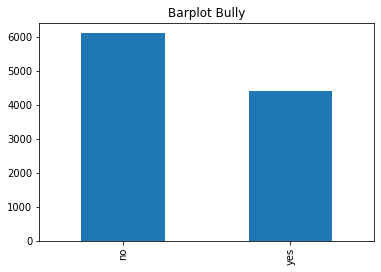

time: 156 ms (started: 2022-09-17 00:22:10 +07:00)


In [7]:
# Plot data bully status
data["bully"].value_counts().plot(kind='bar',title="Barplot Bully")

<AxesSubplot:title={'center':'Barplot individual'}>

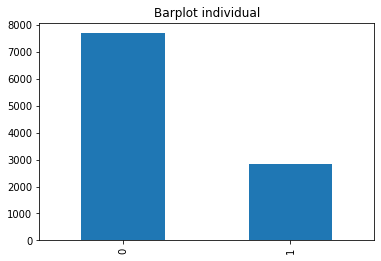

time: 94 ms (started: 2022-09-17 00:22:10 +07:00)


In [8]:
# Plot data bully status
data["individual"].value_counts().plot(kind='bar',title="Barplot individual")

<AxesSubplot:title={'center':'Barplot group'}>

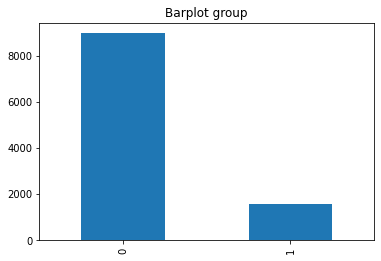

time: 94 ms (started: 2022-09-17 00:22:10 +07:00)


In [9]:
# Plot data group status
data["group"].value_counts().plot(kind='bar',title="Barplot group")

<AxesSubplot:title={'center':'Barplot gender'}>

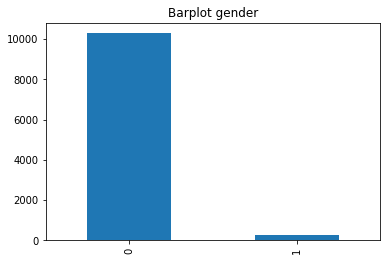

time: 93 ms (started: 2022-09-17 00:22:10 +07:00)


In [10]:
# Plot data gender status
data["gender"].value_counts().plot(kind='bar',title="Barplot gender")

<AxesSubplot:title={'center':'Barplot physical'}>

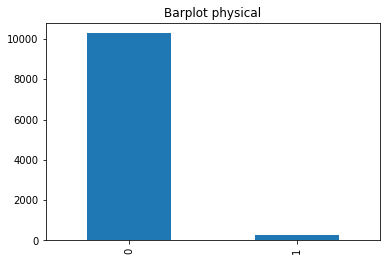

time: 94 ms (started: 2022-09-17 00:22:10 +07:00)


In [11]:
# Plot data physical status
data["physical"].value_counts().plot(kind='bar',title="Barplot physical")

<AxesSubplot:title={'center':'Barplot race'}>

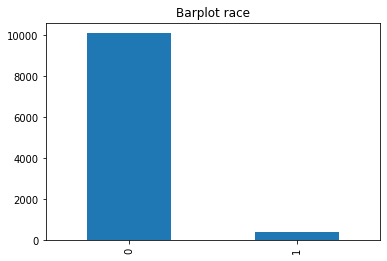

time: 94 ms (started: 2022-09-17 00:22:10 +07:00)


In [12]:
# Plot data race status
data["race"].value_counts().plot(kind='bar',title="Barplot race")

<AxesSubplot:title={'center':'Barplot religion'}>

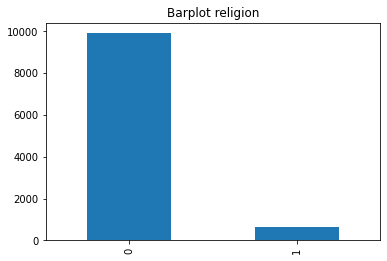

time: 93 ms (started: 2022-09-17 00:22:10 +07:00)


In [13]:
# Plot data religion status
data["religion"].value_counts().plot(kind='bar',title="Barplot religion")

# TFIDF

In [14]:
# TF-IDF
tf=TfidfVectorizer()
text_tf=tf.fit_transform(data["tweet_preprocessed_complete"].astype("U")).toarray()
text_tf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

time: 297 ms (started: 2022-09-17 00:22:11 +07:00)


In [15]:
text_tf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

time: 16 ms (started: 2022-09-17 00:22:11 +07:00)


# Splitting data

In [16]:
data.columns

Index(['Unnamed: 0', 'bully', 'tweet', 'individual', 'group', 'gender',
       'physical', 'race', 'religion', 'tweet_preprocessed',
       'tweet_preprocessed_tokenized', 'tweet_preprocessed_complete'],
      dtype='object')

time: 15 ms (started: 2022-09-17 00:22:11 +07:00)


In [17]:
y=data[['individual', 'group', 'gender','physical', 'race', 'religion']]

time: 0 ns (started: 2022-09-17 00:22:11 +07:00)


In [18]:
y

,individual,group,gender,physical,race,religion
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,1,0,1,1,0,0
3,0,0,0,0,0,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
10530,0,1,0,0,0,0
10531,1,0,0,0,0,0
10532,0,1,0,0,0,0
10533,0,1,0,0,0,0


time: 15 ms (started: 2022-09-17 00:22:11 +07:00)


In [19]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(text_tf,y,test_size=0.25,random_state=99)

time: 750 ms (started: 2022-09-17 00:22:11 +07:00)


# Model

## BinaryRelevance Multinomial Naive Bayes

In [20]:
# Using BinaryRelevance
binary_rel_clf=BinaryRelevance(MultinomialNB())

time: 0 ns (started: 2022-09-17 00:22:12 +07:00)


In [21]:
binary_rel_clf.fit(X_train,y_train)

BinaryRelevance(classifier=MultinomialNB(), require_dense=[True, True])

time: 5.83 s (started: 2022-09-17 00:22:12 +07:00)


In [22]:
br_prediction = binary_rel_clf.predict(X_test)

time: 500 ms (started: 2022-09-17 00:22:17 +07:00)


In [23]:
br_prediction.toarray()

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]], dtype=int64)

time: 0 ns (started: 2022-09-17 00:22:18 +07:00)


In [24]:
# Check Classification report
print(classification_report(y_test,br_prediction))

              precision    recall  f1-score   support

           0       0.86      0.10      0.17       695
           1       0.78      0.02      0.03       391
           2       0.00      0.00      0.00        61
           3       0.00      0.00      0.00        60
           4       0.00      0.00      0.00        98
           5       1.00      0.01      0.01       150

   micro avg       0.85      0.05      0.10      1455
   macro avg       0.44      0.02      0.04      1455
weighted avg       0.72      0.05      0.09      1455
 samples avg       0.03      0.02      0.03      1455

time: 16 ms (started: 2022-09-17 00:22:18 +07:00)


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(aver

In [25]:
accuracy_score(y_test,br_prediction)

0.6051632498101747

time: 0 ns (started: 2022-09-17 00:22:18 +07:00)


## Adapt MLkNN

In [26]:
# Using MLKNN
classifier =MLkNN()

time: 0 ns (started: 2022-09-17 00:22:18 +07:00)


In [27]:
X_train = lil_matrix(X_train).toarray()
y_train = lil_matrix(y_train).toarray()
X_test = lil_matrix(X_test).toarray()

time: 2.02 s (started: 2022-09-17 00:22:18 +07:00)


In [28]:
classifier.fit(X_train,y_train)

C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


MLkNN()

time: 10.5 s (started: 2022-09-17 00:22:20 +07:00)


In [29]:
predictions = classifier.predict(X_test)

time: 5.88 s (started: 2022-09-17 00:22:31 +07:00)


In [30]:
# Check Classification report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.60      0.57      0.58       695
           1       0.68      0.38      0.49       391
           2       0.42      0.25      0.31        61
           3       0.75      0.30      0.43        60
           4       0.64      0.47      0.54        98
           5       0.68      0.52      0.59       150

   micro avg       0.62      0.48      0.54      1455
   macro avg       0.63      0.41      0.49      1455
weighted avg       0.63      0.48      0.54      1455
 samples avg       0.22      0.20      0.21      1455

time: 16 ms (started: 2022-09-17 00:22:37 +07:00)


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))

Accuracy =  0.6799544419134397
time: 0 ns (started: 2022-09-17 00:22:37 +07:00)


In [32]:
classifier.get_params()

{'k': 10, 's': 1.0, 'ignore_first_neighbours': 0}

time: 0 ns (started: 2022-09-17 00:22:37 +07:00)


In [33]:
parameters = {'k': range(1,25), 's': [0.5, 0.7, 1.0]}
score = 'f1_macro'

time: 0 ns (started: 2022-09-17 00:22:37 +07:00)


In [34]:
clf = GridSearchCV(MLkNN(), parameters, scoring=score,verbose = 2)
clf.fit(X_train,y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=1, s=0.5; total time=   9.8s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=1, s=0.5; total time=   9.8s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=1, s=0.5; total time=   9.8s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=1, s=0.5; total time=   9.7s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=1, s=0.5; total time=   9.7s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=1, s=0.7; total time=   9.7s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=1, s=0.7; total time=   9.9s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=1, s=0.7; total time=   9.7s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=1, s=0.7; total time=   9.7s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=1, s=0.7; total time=   9.7s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=1, s=1.0; total time=   9.7s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=1, s=1.0; total time=   9.7s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=1, s=1.0; total time=   9.8s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=1, s=1.0; total time=   9.7s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=1, s=1.0; total time=   9.7s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=2 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=2, s=0.5; total time=   9.8s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=2 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=2, s=0.5; total time=   9.8s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=2 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=2, s=0.5; total time=   9.9s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=2 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=2, s=0.5; total time=   9.9s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=2 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=2, s=0.5; total time=   9.8s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=2 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=2, s=0.7; total time=   9.8s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=2 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=2, s=0.7; total time=   9.9s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=2 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=2, s=0.7; total time=  10.0s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=2 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=2, s=0.7; total time=   9.9s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=2 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=2, s=0.7; total time=   9.9s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=2 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=2, s=1.0; total time=   9.8s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=2 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=2, s=1.0; total time=   9.9s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=2 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=2, s=1.0; total time=  10.1s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=2 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=2, s=1.0; total time=   9.9s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=2 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=2, s=1.0; total time=  10.5s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=3 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=3, s=0.5; total time=  10.6s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=3 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=3, s=0.5; total time=  10.2s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=3 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=3, s=0.5; total time=  10.2s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=3 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=3, s=0.5; total time=   9.9s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=3 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=3, s=0.5; total time=   9.9s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=3 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=3, s=0.7; total time=   9.9s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=3 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=3, s=0.7; total time=   9.9s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=3 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=3, s=0.7; total time=   9.9s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=3 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=3, s=0.7; total time=   9.9s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=3 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=3, s=0.7; total time=   9.9s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=3 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=3, s=1.0; total time=   9.8s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=3 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=3, s=1.0; total time=   9.9s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=3 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=3, s=1.0; total time=   9.9s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=3 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=3, s=1.0; total time=   9.9s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=3 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=3, s=1.0; total time=   9.9s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=4 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=4, s=0.5; total time=  10.1s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=4 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=4, s=0.5; total time=  10.1s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=4 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=4, s=0.5; total time=  10.1s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=4 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=4, s=0.5; total time=  10.4s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=4 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=4, s=0.5; total time=  10.1s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=4 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=4, s=0.7; total time=  10.1s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=4 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=4, s=0.7; total time=  10.0s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=4 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=4, s=0.7; total time=  10.2s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=4 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=4, s=0.7; total time=  10.2s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=4 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=4, s=0.7; total time=  10.1s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=4 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=4, s=1.0; total time=  10.2s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=4 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=4, s=1.0; total time=  10.1s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=4 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=4, s=1.0; total time=  10.1s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=4 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=4, s=1.0; total time=  10.2s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=4 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=4, s=1.0; total time=  10.2s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=5 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=5, s=0.5; total time=  10.1s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=5 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=5, s=0.5; total time=  10.1s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=5 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=5, s=0.5; total time=  10.1s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=5 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=5, s=0.5; total time=  10.2s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=5 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=5, s=0.5; total time=  10.1s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=5 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=5, s=0.7; total time=  10.2s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=5 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=5, s=0.7; total time=  10.1s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=5 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=5, s=0.7; total time=  10.1s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=5 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=5, s=0.7; total time=  10.2s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=5 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=5, s=0.7; total time=  10.1s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=5 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=5, s=1.0; total time=  10.1s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=5 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=5, s=1.0; total time=  10.1s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=5 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=5, s=1.0; total time=  10.1s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=5 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=5, s=1.0; total time=  10.2s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=5 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=5, s=1.0; total time=  10.1s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=6 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=6, s=0.5; total time=  10.1s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=6 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=6, s=0.5; total time=  10.2s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=6 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=6, s=0.5; total time=  10.1s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=6 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=6, s=0.5; total time=  10.5s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=6 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=6, s=0.5; total time=  10.2s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=6 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=6, s=0.7; total time=  10.1s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=6 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=6, s=0.7; total time=  10.2s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=6 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=6, s=0.7; total time=  10.2s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=6 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=6, s=0.7; total time=  10.3s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=6 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=6, s=0.7; total time=  10.1s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=6 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=6, s=1.0; total time=  10.1s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=6 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=6, s=1.0; total time=  10.1s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=6 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=6, s=1.0; total time=  10.1s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=6 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=6, s=1.0; total time=  10.2s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=6 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=6, s=1.0; total time=  10.6s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=7 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=7, s=0.5; total time=  10.2s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=7 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=7, s=0.5; total time=  10.2s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=7 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=7, s=0.5; total time=  10.1s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=7 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=7, s=0.5; total time=  10.2s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=7 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=7, s=0.5; total time=  10.3s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=7 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=7, s=0.7; total time=  10.2s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=7 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=7, s=0.7; total time=  10.4s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=7 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=7, s=0.7; total time=  10.2s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=7 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=7, s=0.7; total time=  10.3s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=7 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=7, s=0.7; total time=  10.2s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=7 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=7, s=1.0; total time=  10.2s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=7 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=7, s=1.0; total time=  10.2s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=7 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=7, s=1.0; total time=  10.2s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=7 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=7, s=1.0; total time=  10.2s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=7 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=7, s=1.0; total time=  10.4s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=8 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=8, s=0.5; total time=  10.2s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=8 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=8, s=0.5; total time=  10.2s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=8 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=8, s=0.5; total time=  10.2s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=8 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=8, s=0.5; total time=  10.3s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=8 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=8, s=0.5; total time=  10.3s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=8 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=8, s=0.7; total time=  10.2s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=8 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=8, s=0.7; total time=  10.3s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=8 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=8, s=0.7; total time=  10.2s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=8 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=8, s=0.7; total time=  10.3s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=8 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=8, s=0.7; total time=  10.5s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=8 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=8, s=1.0; total time=  10.3s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=8 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=8, s=1.0; total time=  10.3s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=8 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=8, s=1.0; total time=  11.1s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=8 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=8, s=1.0; total time=  10.5s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=8 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=8, s=1.0; total time=  10.4s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=9 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=9, s=0.5; total time=  10.2s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=9 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=9, s=0.5; total time=  10.3s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=9 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=9, s=0.5; total time=  10.2s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=9 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=9, s=0.5; total time=  10.2s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=9 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=9, s=0.5; total time=  10.3s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=9 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=9, s=0.7; total time=  10.3s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=9 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=9, s=0.7; total time=  10.2s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=9 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=9, s=0.7; total time=  10.2s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=9 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=9, s=0.7; total time=  10.3s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=9 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=9, s=0.7; total time=  10.3s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=9 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=9, s=1.0; total time=  10.3s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=9 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=9, s=1.0; total time=  10.3s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=9 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=9, s=1.0; total time=  10.2s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=9 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=9, s=1.0; total time=  10.2s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=9 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END .........................................k=9, s=1.0; total time=  10.3s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=10, s=0.5; total time=  10.4s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=10, s=0.5; total time=  10.8s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=10, s=0.5; total time=  10.3s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=10, s=0.5; total time=  10.3s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=10, s=0.5; total time=  10.3s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=10, s=0.7; total time=  10.5s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=10, s=0.7; total time=  10.3s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=10, s=0.7; total time=  10.3s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=10, s=0.7; total time=  10.2s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=10, s=0.7; total time=  10.4s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=10, s=1.0; total time=  10.3s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=10, s=1.0; total time=  10.6s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=10, s=1.0; total time=  10.6s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=10, s=1.0; total time=  10.3s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=10, s=1.0; total time=  10.3s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=11 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=11, s=0.5; total time=  10.4s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=11 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=11, s=0.5; total time=  10.2s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=11 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=11, s=0.5; total time=  10.3s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=11 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=11, s=0.5; total time=  10.3s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=11 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=11, s=0.5; total time=  10.3s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=11 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=11, s=0.7; total time=  10.4s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=11 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=11, s=0.7; total time=  10.3s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=11 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=11, s=0.7; total time=  10.4s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=11 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=11, s=0.7; total time=  10.3s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=11 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=11, s=0.7; total time=  10.3s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=11 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=11, s=1.0; total time=  10.4s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=11 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=11, s=1.0; total time=  10.3s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=11 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=11, s=1.0; total time=  10.3s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=11 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=11, s=1.0; total time=  10.3s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=11 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=11, s=1.0; total time=  10.3s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=12 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=12, s=0.5; total time=  10.4s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=12 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=12, s=0.5; total time=  10.3s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=12 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=12, s=0.5; total time=  10.3s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=12 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=12, s=0.5; total time=  10.4s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=12 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=12, s=0.5; total time=  10.4s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=12 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=12, s=0.7; total time=  10.7s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=12 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=12, s=0.7; total time=  10.4s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=12 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=12, s=0.7; total time=  10.3s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=12 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=12, s=0.7; total time=  10.3s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=12 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=12, s=0.7; total time=  10.3s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=12 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=12, s=1.0; total time=  10.5s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=12 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=12, s=1.0; total time=  10.3s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=12 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=12, s=1.0; total time=  10.4s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=12 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=12, s=1.0; total time=  10.3s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=12 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=12, s=1.0; total time=  10.4s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=13 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=13, s=0.5; total time=  10.4s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=13 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=13, s=0.5; total time=  10.5s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=13 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=13, s=0.5; total time=  10.4s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=13 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=13, s=0.5; total time=  10.3s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=13 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=13, s=0.5; total time=  10.4s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=13 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=13, s=0.7; total time=  10.4s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=13 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=13, s=0.7; total time=  10.5s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=13 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=13, s=0.7; total time=  10.4s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=13 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=13, s=0.7; total time=  10.3s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=13 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=13, s=0.7; total time=  10.4s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=13 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=13, s=1.0; total time=  10.4s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=13 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=13, s=1.0; total time=  10.4s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=13 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=13, s=1.0; total time=  10.4s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=13 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=13, s=1.0; total time=  10.8s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=13 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=13, s=1.0; total time=  10.4s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=14 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=14, s=0.5; total time=  10.5s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=14 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=14, s=0.5; total time=  10.4s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=14 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=14, s=0.5; total time=  10.4s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=14 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=14, s=0.5; total time=  10.4s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=14 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=14, s=0.5; total time=  10.4s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=14 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=14, s=0.7; total time=  10.4s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=14 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=14, s=0.7; total time=  10.5s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=14 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=14, s=0.7; total time=  10.4s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=14 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=14, s=0.7; total time=  11.6s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=14 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=14, s=0.7; total time=  10.8s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=14 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=14, s=1.0; total time=  10.4s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=14 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=14, s=1.0; total time=  10.4s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=14 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=14, s=1.0; total time=  10.4s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=14 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=14, s=1.0; total time=  10.4s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=14 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=14, s=1.0; total time=  10.4s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=15 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=15, s=0.5; total time=  10.5s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=15 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=15, s=0.5; total time=  10.4s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=15 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=15, s=0.5; total time=  10.5s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=15 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=15, s=0.5; total time=  10.4s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=15 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=15, s=0.5; total time=  10.5s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=15 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=15, s=0.7; total time=  10.5s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=15 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=15, s=0.7; total time=  10.5s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=15 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=15, s=0.7; total time=  10.4s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=15 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=15, s=0.7; total time=  10.4s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=15 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=15, s=0.7; total time=  10.5s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=15 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=15, s=1.0; total time=  10.4s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=15 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=15, s=1.0; total time=  10.5s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=15 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=15, s=1.0; total time=  10.5s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=15 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=15, s=1.0; total time=  10.4s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=15 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=15, s=1.0; total time=  10.5s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=16 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=16, s=0.5; total time=  10.5s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=16 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=16, s=0.5; total time=  10.4s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=16 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=16, s=0.5; total time=  10.5s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=16 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=16, s=0.5; total time=  10.5s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=16 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=16, s=0.5; total time=  10.5s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=16 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=16, s=0.7; total time=  10.5s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=16 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=16, s=0.7; total time=  10.5s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=16 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=16, s=0.7; total time=  10.4s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=16 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=16, s=0.7; total time=  10.5s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=16 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=16, s=0.7; total time=  10.5s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=16 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=16, s=1.0; total time=  10.5s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=16 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=16, s=1.0; total time=  10.6s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=16 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=16, s=1.0; total time=  10.4s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=16 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=16, s=1.0; total time=  10.5s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=16 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=16, s=1.0; total time=  10.4s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=17 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=17, s=0.5; total time=  10.5s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=17 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=17, s=0.5; total time=  10.4s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=17 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=17, s=0.5; total time=  10.6s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=17 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=17, s=0.5; total time=  10.5s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=17 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=17, s=0.5; total time=  10.6s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=17 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=17, s=0.7; total time=  10.5s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=17 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=17, s=0.7; total time=  10.5s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=17 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=17, s=0.7; total time=  10.6s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=17 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=17, s=0.7; total time=  10.5s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=17 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=17, s=0.7; total time=  10.5s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=17 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=17, s=1.0; total time=  10.5s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=17 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=17, s=1.0; total time=  10.5s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=17 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=17, s=1.0; total time=  10.5s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=17 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=17, s=1.0; total time=  10.5s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=17 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=17, s=1.0; total time=  10.5s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=18 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=18, s=0.5; total time=  10.5s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=18 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=18, s=0.5; total time=  10.5s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=18 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=18, s=0.5; total time=  10.5s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=18 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=18, s=0.5; total time=  10.5s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=18 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=18, s=0.5; total time=  10.7s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=18 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=18, s=0.7; total time=  10.7s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=18 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=18, s=0.7; total time=  10.6s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=18 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=18, s=0.7; total time=  10.5s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=18 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=18, s=0.7; total time=  10.5s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=18 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=18, s=0.7; total time=  10.7s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=18 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=18, s=1.0; total time=  10.6s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=18 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=18, s=1.0; total time=  10.5s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=18 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=18, s=1.0; total time=  10.5s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=18 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=18, s=1.0; total time=  10.6s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=18 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=18, s=1.0; total time=  10.6s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=19 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=19, s=0.5; total time=  10.6s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=19 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=19, s=0.5; total time=  10.6s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=19 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=19, s=0.5; total time=  10.5s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=19 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=19, s=0.5; total time=  10.7s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=19 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=19, s=0.5; total time=  10.6s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=19 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=19, s=0.7; total time=  10.5s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=19 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=19, s=0.7; total time=  10.5s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=19 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=19, s=0.7; total time=  10.6s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=19 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=19, s=0.7; total time=  10.6s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=19 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=19, s=0.7; total time=  10.7s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=19 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=19, s=1.0; total time=  10.6s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=19 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=19, s=1.0; total time=  10.6s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=19 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=19, s=1.0; total time=  10.6s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=19 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=19, s=1.0; total time=  10.6s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=19 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=19, s=1.0; total time=  10.6s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=20 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=20, s=0.5; total time=  10.7s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=20 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=20, s=0.5; total time=  10.6s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=20 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=20, s=0.5; total time=  10.6s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=20 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=20, s=0.5; total time=  11.5s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=20 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=20, s=0.5; total time=  11.9s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=20 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=20, s=0.7; total time=  11.8s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=20 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=20, s=0.7; total time=  11.7s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=20 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=20, s=0.7; total time=  10.9s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=20 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=20, s=0.7; total time=  10.9s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=20 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=20, s=0.7; total time=  10.7s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=20 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=20, s=1.0; total time=  10.5s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=20 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=20, s=1.0; total time=  10.6s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=20 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=20, s=1.0; total time=  10.5s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=20 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=20, s=1.0; total time=  10.6s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=20 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=20, s=1.0; total time=  10.6s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=21 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=21, s=0.5; total time=  10.7s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=21 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=21, s=0.5; total time=  10.6s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=21 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=21, s=0.5; total time=  10.6s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=21 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=21, s=0.5; total time=  10.6s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=21 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=21, s=0.5; total time=  10.6s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=21 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=21, s=0.7; total time=  11.1s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=21 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=21, s=0.7; total time=  10.7s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=21 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=21, s=0.7; total time=  10.7s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=21 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=21, s=0.7; total time=  10.6s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=21 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=21, s=0.7; total time=  10.6s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=21 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=21, s=1.0; total time=  10.7s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=21 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=21, s=1.0; total time=  10.6s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=21 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=21, s=1.0; total time=  10.6s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=21 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=21, s=1.0; total time=  10.6s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=21 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=21, s=1.0; total time=  10.7s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=22 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=22, s=0.5; total time=  10.8s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=22 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=22, s=0.5; total time=  10.7s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=22 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=22, s=0.5; total time=  10.6s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=22 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=22, s=0.5; total time=  10.6s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=22 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=22, s=0.5; total time=  10.7s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=22 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=22, s=0.7; total time=  10.8s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=22 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=22, s=0.7; total time=  10.8s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=22 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=22, s=0.7; total time=  10.7s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=22 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=22, s=0.7; total time=  10.6s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=22 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=22, s=0.7; total time=  10.7s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=22 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=22, s=1.0; total time=  10.8s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=22 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=22, s=1.0; total time=  10.6s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=22 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=22, s=1.0; total time=  10.7s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=22 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=22, s=1.0; total time=  10.7s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=22 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=22, s=1.0; total time=  10.6s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=23 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=23, s=0.5; total time=  10.7s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=23 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=23, s=0.5; total time=  10.8s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=23 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=23, s=0.5; total time=  10.8s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=23 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=23, s=0.5; total time=  10.6s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=23 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=23, s=0.5; total time=  10.7s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=23 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=23, s=0.7; total time=  10.7s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=23 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=23, s=0.7; total time=  10.8s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=23 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=23, s=0.7; total time=  10.7s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=23 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=23, s=0.7; total time=  10.6s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=23 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=23, s=0.7; total time=  10.7s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=23 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=23, s=1.0; total time=  10.7s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=23 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=23, s=1.0; total time=  10.7s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=23 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=23, s=1.0; total time=  10.7s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=23 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=23, s=1.0; total time=  10.7s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=23 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=23, s=1.0; total time=  10.8s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=24 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=24, s=0.5; total time=  10.7s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=24 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=24, s=0.5; total time=  10.8s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=24 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=24, s=0.5; total time=  10.8s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=24 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=24, s=0.5; total time=  10.7s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=24 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=24, s=0.5; total time=  10.7s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=24 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=24, s=0.7; total time=  10.7s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=24 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=24, s=0.7; total time=  10.8s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=24 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=24, s=0.7; total time=  10.7s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=24 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=24, s=0.7; total time=  10.7s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=24 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=24, s=0.7; total time=  10.7s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=24 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=24, s=1.0; total time=  10.7s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=24 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=24, s=1.0; total time=  10.8s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=24 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=24, s=1.0; total time=  10.7s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=24 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=24, s=1.0; total time=  10.8s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=24 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[CV] END ........................................k=24, s=1.0; total time=  10.9s


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=19 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


GridSearchCV(estimator=MLkNN(),
             param_grid={'k': range(1, 25), 's': [0.5, 0.7, 1.0]},
             scoring='f1_macro', verbose=2)

time: 1h 3min 28s (started: 2022-09-17 00:22:37 +07:00)


In [35]:
clf.best_params_

{'k': 19, 's': 0.5}

time: 0 ns (started: 2022-09-17 01:26:05 +07:00)


In [36]:
clf.best_score_

0.4899852853116194

time: 0 ns (started: 2022-09-17 01:26:05 +07:00)


In [37]:
classifier2 =MLkNN(k=19, s= 0.5)

time: 0 ns (started: 2022-09-17 06:35:56 +07:00)


In [38]:
classifier2.fit(X_train,y_train)

C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=19 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


MLkNN(k=19, s=0.5)

time: 11.3 s (started: 2022-09-17 06:36:20 +07:00)


In [39]:
predictions2 = classifier2.predict(X_test)

time: 6.23 s (started: 2022-09-17 06:36:50 +07:00)


In [40]:
# Check Classification report
print(classification_report(y_test,predictions2))

              precision    recall  f1-score   support

           0       0.65      0.56      0.60       695
           1       0.74      0.35      0.47       391
           2       0.44      0.23      0.30        61
           3       0.64      0.30      0.41        60
           4       0.65      0.51      0.57        98
           5       0.72      0.49      0.58       150

   micro avg       0.66      0.47      0.55      1455
   macro avg       0.64      0.41      0.49      1455
weighted avg       0.67      0.47      0.54      1455
 samples avg       0.21      0.20      0.20      1455

time: 16 ms (started: 2022-09-17 06:37:04 +07:00)


C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions2))

Accuracy =  0.693621867881549
time: 0 ns (started: 2022-09-17 06:37:32 +07:00)
